# Plotting timeseries data

Most of the data that we want to plot with `Matplotlib` will be in tabular format. In the second demo of this week, we will make some plots to display daily reservoir levels of [Fall Creek Reservoir](https://en.wikipedia.org/wiki/Fall_Creek_Lake) in the Willamette National Forest. 

```{image} images/fall_creek.jpg
:alt: fall creek reservoir
:class: bg-primary mb-1
:width: 600px
:align: center
```

## Daily reservoir levels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/fall_creek_levels.csv')
df

,date,level
0,2020-11-05,677.94
1,2020-11-06,691.36
2,2020-11-07,693.29
3,2020-11-08,694.50
4,2020-11-09,694.56
...,...,...
582,2022-06-10,829.63
583,2022-06-11,830.73
584,2022-06-12,830.90
585,2022-06-13,830.65


We can see that we have a table with two columns. The first column contains dates (from Nov 5, 2020 to June 14, 2022) and the second column contains reservoir level (in feet). Before we plot, we need to make sure that `Pandas` has interpreted the **date** column as dates.

In [3]:
df.dtypes

date      object
level    float64
dtype: object

While the **level** column has been interpeted as a `float64`, the **date** column has not been recognized as dates. We have to alert `Pandas` that this column contains dates using the keyword argument `parse_dates` when we read the file.

In [4]:
df = pd.read_csv('data/fall_creek_levels.csv', parse_dates=['date'])
df

,date,level
0,2020-11-05,677.94
1,2020-11-06,691.36
2,2020-11-07,693.29
3,2020-11-08,694.50
4,2020-11-09,694.56
...,...,...
582,2022-06-10,829.63
583,2022-06-11,830.73
584,2022-06-12,830.90
585,2022-06-13,830.65


Now when we display the column data types, we find that the **date** column has been interpreted as a **NumPy datetime**.

In [5]:
df.dtypes

date     datetime64[ns]
level           float64
dtype: object

```{note}
`parse_dates` will automatically recognize and convert many common date formats. But if the date and time is formatted unusually, we might have to specify the format. We can do that using a parser function (see below).
```

In [6]:
parser = lambda date: pd.to_datetime(date).strftime('%Y-%m-%d')
df = pd.read_csv('data/fall_creek_levels.csv', parse_dates=['date'], date_parser=parser)

/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_49651/4277095575.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('data/fall_creek_levels.csv', parse_dates=['date'], date_parser=parser)


In [9]:
df['date']

0     2020-11-05
1     2020-11-06
2     2020-11-07
3     2020-11-08
4     2020-11-09
         ...    
582   2022-06-10
583   2022-06-11
584   2022-06-12
585   2022-06-13
586   2022-06-14
Name: date, Length: 587, dtype: datetime64[ns]

Now that we have read our dataset as a DataFrame, we can plot it easily.

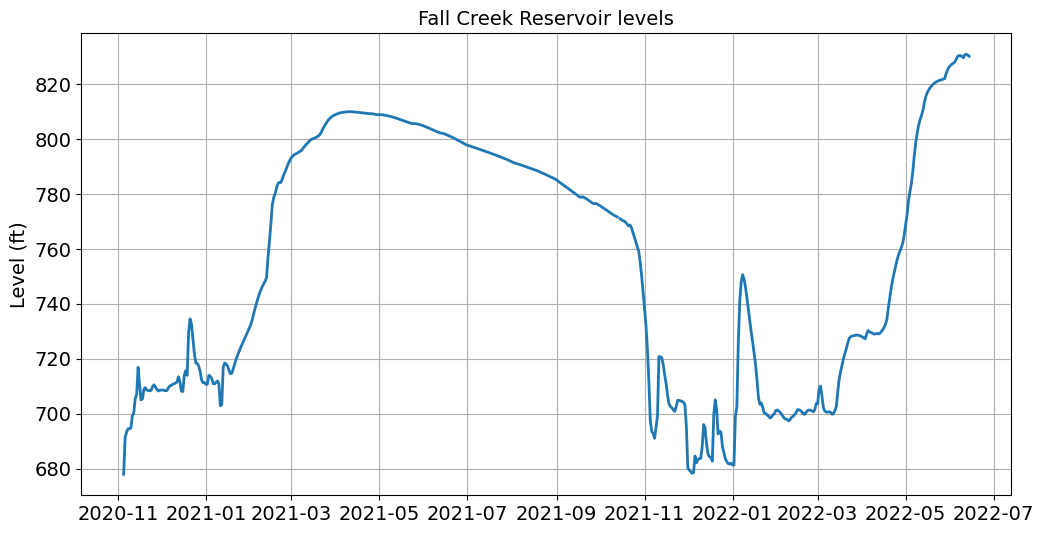

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['date'].values, df['level'].values, linewidth=2)
ax.set_title('Fall Creek Reservoir levels', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylabel('Level (ft)', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.grid()
plt.show()

This looks great but the tick labels on the x-axis are difficult to read. We can edit the tick labels using the `dates.mdates` functions.

In [13]:
import matplotlib.dates as mdates

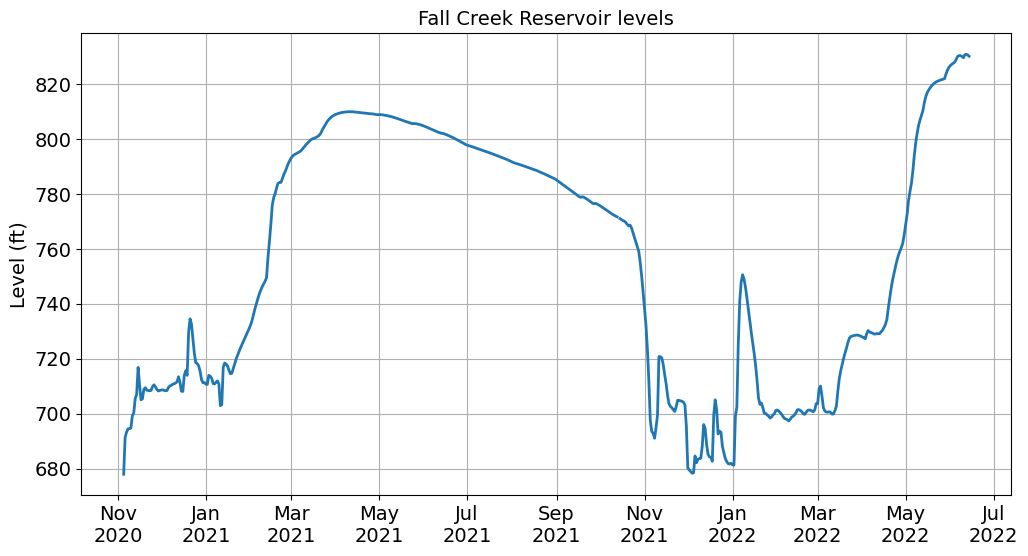

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['date'].values, df['level'].values, linewidth=2)
ax.set_title('Fall Creek Reservoir levels', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylabel('Level (ft)', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y')) # <-----

plt.show()

```{note}
We formatted the dates using an abbreviated month name (`%b`) followed by a new line (`\n`) followed by the year (`%Y`). See this [table](https://docs.python.org/3/library/time.html#time.strftime) for more options.
```

## 5-minute air temperature

Next we will plot some time-series data with higher temporal resolution. This file contains air temperatures from a U.S. Climate Reference Network weather station near Corvallis. 

In [16]:
df = pd.read_csv('data/corvallis_air_temp.csv')
df

,date,time,air_temp
0,20220610,10,24.3
1,20220610,15,24.0
2,20220610,20,23.7
3,20220610,25,23.1
4,20220610,30,22.7
...,...,...,...
1650,20220615,1740,13.9
1651,20220615,1745,14.7
1652,20220615,1750,14.6
1653,20220615,1755,14.9


When we have a look at the data, we find that the dates are in one column and the time is in another. So we will use another parser function to transform dates and times in **ISO 8601** format (i.e. `yyyy-mm-dd hh:mm:ss`)

In [17]:
parser = lambda date: pd.to_datetime(date).strftime('%Y%m%d %H%M')
df = pd.read_csv('data/corvallis_air_temp.csv', parse_dates={'datetime': ['date', 'time']}, date_parser=parser)
df

/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_49651/910982156.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('data/corvallis_air_temp.csv', parse_dates={'datetime': ['date', 'time']}, date_parser=parser)


,datetime,air_temp
0,2022-06-10 00:10:00,24.3
1,2022-06-10 00:15:00,24.0
2,2022-06-10 00:20:00,23.7
3,2022-06-10 00:25:00,23.1
4,2022-06-10 00:30:00,22.7
...,...,...
1650,2022-06-15 17:40:00,13.9
1651,2022-06-15 17:45:00,14.7
1652,2022-06-15 17:50:00,14.6
1653,2022-06-15 17:55:00,14.9


In [18]:
df.dtypes

datetime    datetime64[ns]
air_temp           float64
dtype: object

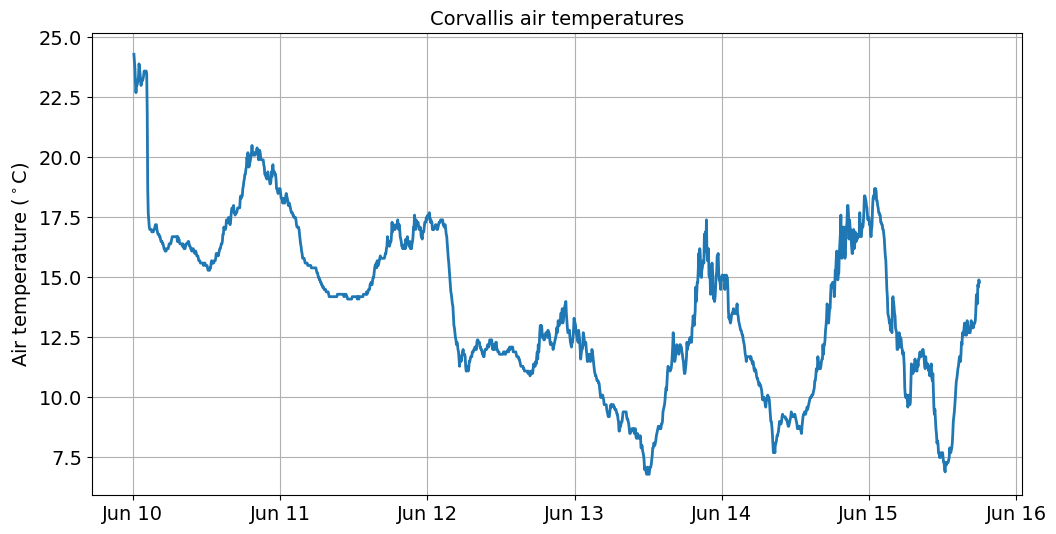

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['datetime'].values, df['air_temp'].values, linewidth=2)
ax.set_title('Corvallis air temperatures', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylabel('Air temperature ($^\circ$C)', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

To plot air temperatures for June 13, we could slice the DataFrame using the `[start:end]` syntax we learnt in Week 1.

In [13]:
df_slice = df[863:1150]
df_slice

,datetime,air_temp
863,2022-06-13 00:05:00,13.1
864,2022-06-13 00:10:00,13.0
865,2022-06-13 00:15:00,12.7
866,2022-06-13 00:20:00,12.6
867,2022-06-13 00:25:00,12.5
...,...,...
1145,2022-06-13 23:35:00,14.9
1146,2022-06-13 23:40:00,14.9
1147,2022-06-13 23:45:00,14.7
1148,2022-06-13 23:50:00,14.5


But this is a little unwieldy because we have to manually find the right index for the start of June 13. A better way of doing this would be to slice by date and time. We can only do this if we make our `datetime` column the  **index column**.

In [27]:
df.set_index('datetime', inplace=True)
df

,air_temp
datetime,
2022-06-10 00:10:00,24.3
2022-06-10 00:15:00,24.0
2022-06-10 00:20:00,23.7
2022-06-10 00:25:00,23.1
2022-06-10 00:30:00,22.7
...,...
2022-06-15 17:40:00,13.9
2022-06-15 17:45:00,14.7
2022-06-15 17:50:00,14.6


Now we can slice the DataFrame using datetime. This time we have to use the `.loc` function to make it clear that we are referring to the index of the DataFrame.

In [28]:
df_slice = df.loc['2022-06-13 00:00:00':'2022-06-13 23:55:00']

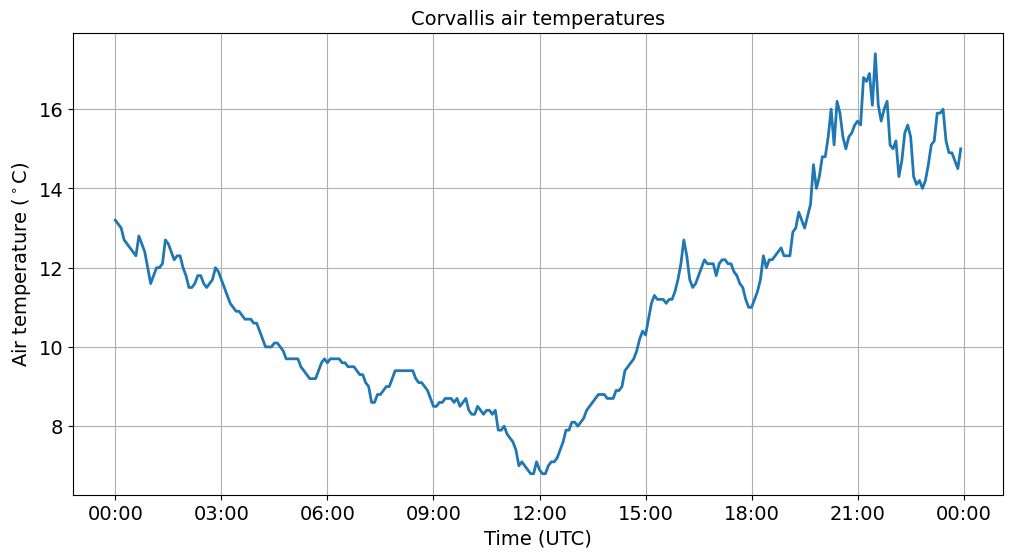

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_slice.index.values, df_slice['air_temp'].values, linewidth=2)
ax.set_title('Corvallis air temperatures', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylabel('Air temperature ($^\circ$C)', fontsize=14)
ax.set_xlabel('Time (UTC)', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

```{note}
Now that we have set the index column to `datetime`, we refer to the x-axis as `df_slice.index`.
```

Strangely the lowest air temperatures occur at noon. This is because our data are in UTC time. So we need to convert to Pacific by subtracting eight hours from our datetime index.

In [32]:
df['pacific_time'] = df.index + pd.DateOffset(hours=-8)
df

,air_temp,pacific_time
datetime,,
2022-06-10 00:10:00,24.3,2022-06-09 16:10:00
2022-06-10 00:15:00,24.0,2022-06-09 16:15:00
2022-06-10 00:20:00,23.7,2022-06-09 16:20:00
2022-06-10 00:25:00,23.1,2022-06-09 16:25:00
2022-06-10 00:30:00,22.7,2022-06-09 16:30:00
...,...,...
2022-06-15 17:40:00,13.9,2022-06-15 09:40:00
2022-06-15 17:45:00,14.7,2022-06-15 09:45:00
2022-06-15 17:50:00,14.6,2022-06-15 09:50:00


In [33]:
df.set_index('pacific_time', inplace=True)
df

,air_temp
pacific_time,
2022-06-09 16:10:00,24.3
2022-06-09 16:15:00,24.0
2022-06-09 16:20:00,23.7
2022-06-09 16:25:00,23.1
2022-06-09 16:30:00,22.7
...,...
2022-06-15 09:40:00,13.9
2022-06-15 09:45:00,14.7
2022-06-15 09:50:00,14.6


Now we can slice using the same syntax as before.

In [34]:
df_pacific_slice = df.loc['2022-06-13 00:00:00':'2022-06-13 23:55:00']

And we produce a more logical figure showing highest air temperatures at around 1 pm. 

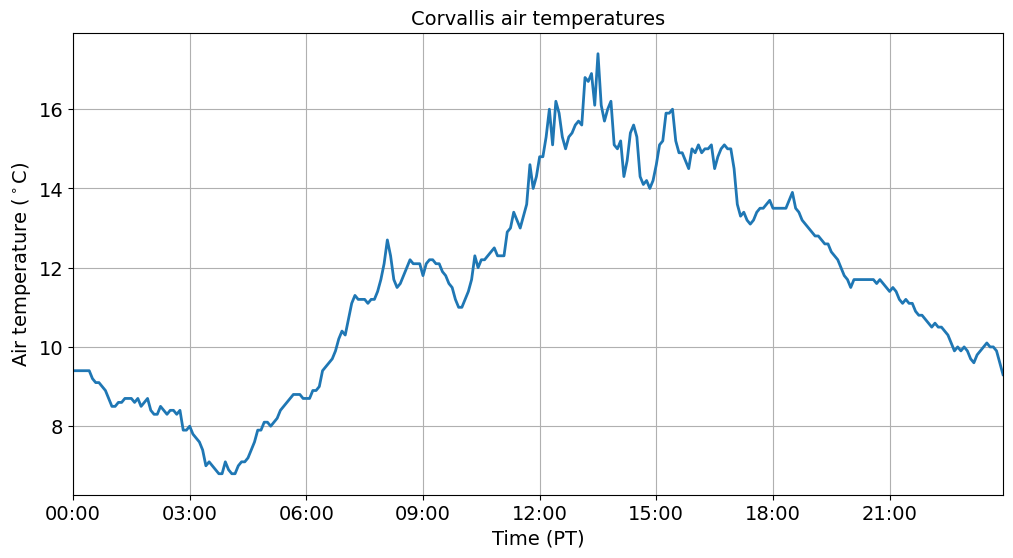

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_pacific_slice.index.values, df_pacific_slice['air_temp'].values, linewidth=2)
ax.set_title('Corvallis air temperatures', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylabel('Air temperature ($^\circ$C)', fontsize=14)
ax.set_xlabel('Time (PT)', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(df_pacific_slice.index[0], df_pacific_slice.index[-1])

plt.show()

## Add some extra information

We can additional information to our plots to make specific points. For example, we could add a dashed vertical line (`vlines`) to show when maximum air temperatures occurred or a dashed horizontal line (`hlines`) to show the the value of the maximum air temperature. 

```{note}
This function has the following syntax `Axes.hlines(y, xmin, xmax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)`
```

In [37]:
# Identify the time and value of the maximum air temperature
highest_temp_idx = df_pacific_slice['air_temp'].idxmax()
highest_temp = df_pacific_slice['air_temp'].max()

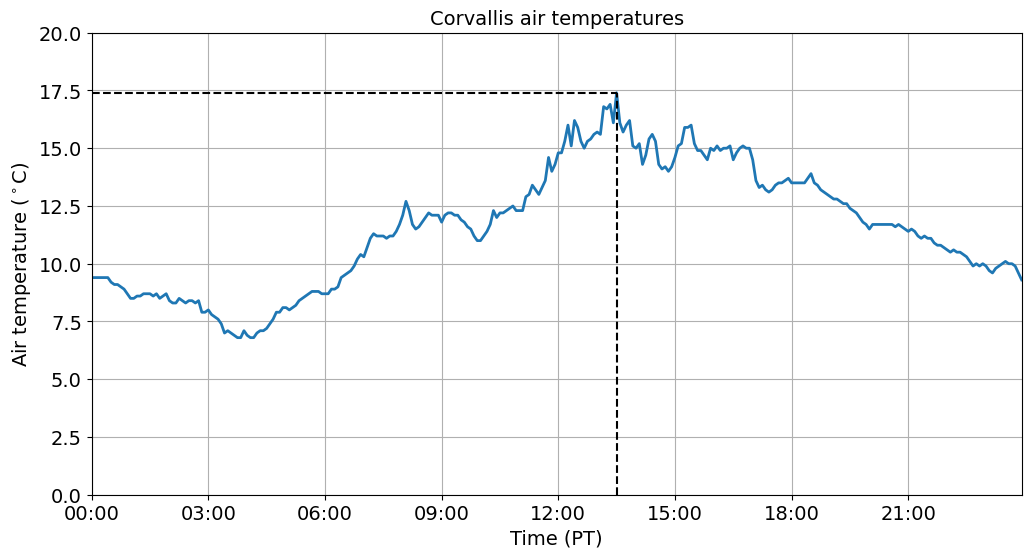

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_pacific_slice.index.values, df_pacific_slice['air_temp'].values, linewidth=2)
ax.set_title('Corvallis air temperatures', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylabel('Air temperature ($^\circ$C)', fontsize=14)
ax.set_xlabel('Time (PT)', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(df_pacific_slice.index[0], df_pacific_slice.index[-1])
ax.set_ylim(0, 20)

ax.vlines(highest_temp_idx, 0, highest_temp, color='k', ls='dashed')
ax.hlines(highest_temp, xmin=df_pacific_slice.index[0], xmax=highest_temp_idx, color='k', ls='dashed')
plt.show()

We can also add some text to our plots using the `annotate` function to make them even more informative. In it's simplest form, the text is placed at `xy`. Optionally, the text can be displayed in another position `xytext`. An arrow pointing from the text to the annotated point xy can then be added by defining `arrowprops`.

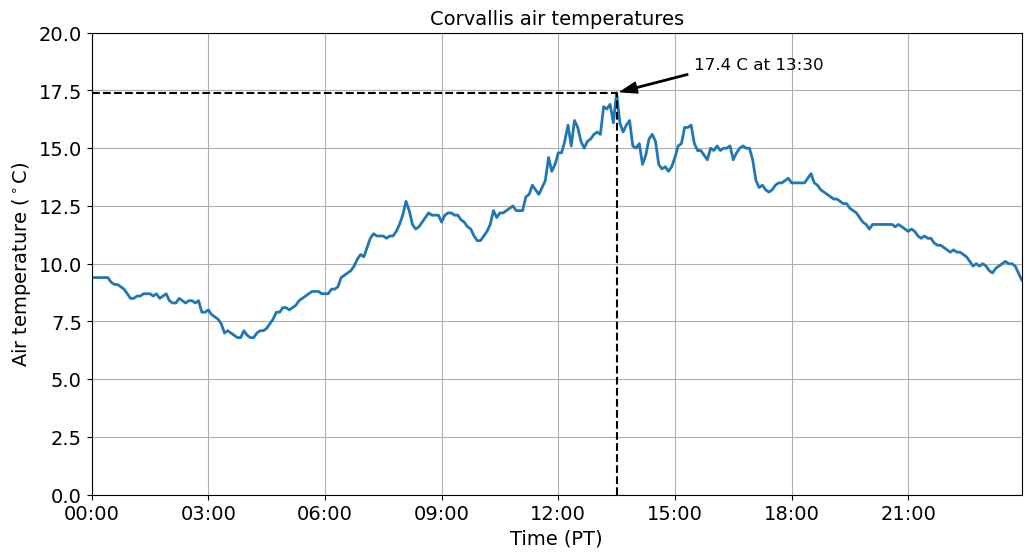

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_pacific_slice.index.values, df_pacific_slice['air_temp'].values, linewidth=2)
ax.set_title('Corvallis air temperatures', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylabel('Air temperature ($^\circ$C)', fontsize=14)
ax.set_xlabel('Time (PT)', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(df_pacific_slice.index[0], df_pacific_slice.index[-1])
ax.set_ylim(0, 20)

ax.vlines(highest_temp_idx, 0, highest_temp, color='k', ls='dashed')
ax.hlines(highest_temp, xmin=df_pacific_slice.index[0], xmax=highest_temp_idx, color='k', ls='dashed')

ax.annotate(f'%.1f C at %s' % (highest_temp, highest_temp_idx.strftime('%H:%M')), 
            xy=(highest_temp_idx, highest_temp), 
            xytext=(highest_temp_idx+pd.DateOffset(hours=2), highest_temp+1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize=12)
plt.show()



## Summary

In this demo, we were introduced to the power of `Pandas` for manipulating and plotting data. Next week, we will demonstrate some of the other things we can do using this library. 